In [1]:
try:
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy import signal
    from dtwalign import dtw
except ImportError as e:
    print(f"Error occurred while importing required libraries: {e}")
    exit()

In [2]:
# Set seed for reproducibility
np.random.seed(1234)

In [3]:
n_timepoints = 200 + 1
t = np.linspace(0, 1, n_timepoints, endpoint=True)

noise_level = 0.1

x1 = signal.gausspulse(t - 0.5, fc=1.e1) + noise_level * np.random.randn(n_timepoints)
x2 = signal.gausspulse(t - 0.3, fc=1.e1) + noise_level * np.random.randn(n_timepoints)


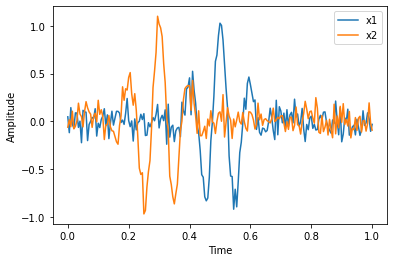

In [4]:
# Plot unaligned data
plt.figure()
plt.plot(t, x1, label="x1")
plt.plot(t, x2, label="x2")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig('unaligned_data.pdf')
plt.show()

In [5]:
# Perform dynamic time warping alignment
res = dtw(x1, x2)

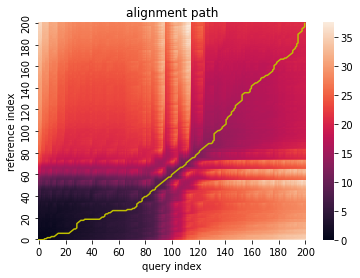

In [6]:
# Plot path of the alignment
res.plot_path()

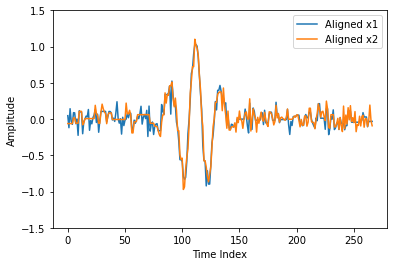

In [7]:
# Plot aligned data
plt.figure()
x1_path = res.path[:, 0]
x2_path = res.path[:, 1]
plt.plot(x1[x1_path], label="Aligned x1")
plt.plot(x2[x2_path], label="Aligned x2")
plt.xlabel('Time Index')
plt.ylabel('Amplitude')
plt.legend()
plt.ylim(-1.5, 1.5)
plt.savefig('aligned_data.pdf')
plt.show()